In [1]:
import pandas as pd
import numpy as np


D:\SoftwareInstallation\python_Anaconda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [4]:
df = pd.read_csv("company_data.csv",encoding="utf-8",names=["company_name","reason","born_time","die_time","live_time","field","address","fund_status"],usecols=[0,1,2,3,4,5,6,7])
t = df.copy()



分析死亡公司的地址，用饼图展示出来

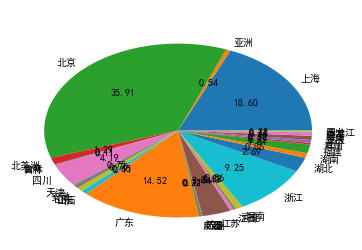

In [14]:
# t.info() # 查看是否有缺失值
t["count"]=1 # 添加一列，列名是count
# 评分饼图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号‘-’显示为方块的问题

# 统计评论的个数
t_result = t.groupby("address")["count"].agg(["count"])
address = t_result.index.tolist()
numbers = [one_values[0] for one_values in t_result.values.tolist()]

plt.pie(numbers,labels=address,autopct="%1.2f")
plt.title("死亡公司地址饼图",color="white")
plt.show()

分析死亡公司的存活时间

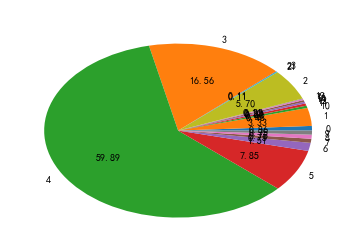

In [21]:
t1 = t.copy()
# 将死亡时间里面的“年”抽出来添加到新的列中。例如“4/7/2”，提取其中的4
t1["live_year"] = t1["live_time"].str.split("/").str[0]
t1_result = t1.groupby("live_year")["count"].agg(["count"])
live_year = t1_result.index.tolist()
year_number = [year_value[0] for year_value in t1_result.values.tolist()]

# 画饼图
plt.pie(year_number,labels=live_year,autopct="%1.2f")
plt.title("死亡公司存活的时间",color="white")
plt.show()

